Charles Vin & Aymeric Delefosse <span style="float:right">DAC</span>

# TME 4 & 5 - Théorie des sous-ensembles flous et logique floue


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Représentation des sous-ensembles flous

In [37]:
sef = {
    "triangulaire": np.array([(1, 0), (4, 1), (6, 0)]),
    "trapezoidal": np.array([(1, 0), (4, 1), (6, 1), (8, 0)]),
    "quelconque": np.array([(1, 0), (4, 1), (6, 0.6), (7, 0.3), (9, 1), (10, 0.5), (15, 0)]),
}

In [39]:
type(True)

bool

# Opération de base

### Question 1

In [57]:
def calculer_degre_appartenance(point, sef):
    """Calcule le degré d'appartenance d'un point à un sous-ensemble flou.

    :param float x: Point de l'univers
    :param np.ndarray sef: Sous-ensemble flou
    :return float: Le degré d'appartenance du point au sous-ensemble flou
    """
    # Vérifier si le point est en dehors des bornes du SEF
    if point < sef[0][0] or point > sef[-1][0]:
        return 0.0

    # Trouver l'intervalle dans lequel le point se situe
    for i in range(len(sef) - 1):
        if sef[i][0] <= point <= sef[i + 1][0]:
            # Calculer la pente et l'ordonnée à l'origine pour l'interpolation linéaire
            x1, y1 = sef[i]
            x2, y2 = sef[i + 1]
            if x2 == x1:
                return y1  # évite la division par zéro si nous avons une "ligne verticale"
            else:
                pente = (y2 - y1) / (x2 - x1)
                ordonnee_origine = y1 - pente * x1

            # Calculer le degré d'appartenance en utilisant l'équation de la ligne
            return pente * point + ordonnee_origine

    return 0.0


for point in np.linspace(0, 10, 5):
    degre = calculer_degre_appartenance(point, sef["trapezoidal"])
    print(f"Le degré d'appartenance du point {point} est {degre}")

Le degré d'appartenance du point 0.0 est 0.0
Le degré d'appartenance du point 2.5 est 0.49999999999999994
Le degré d'appartenance du point 5.0 est 1.0
Le degré d'appartenance du point 7.5 est 0.25
Le degré d'appartenance du point 10.0 est 0.0


En utilisant [`numpy.interp`](https://numpy.org/doc/stable/reference/generated/numpy.interp.html) :

In [58]:
def calculer_degre_appartenance(point, sef):
    return np.interp(point, sef[:, 0], sef[:, 1], left=0.0, right=0.0)


for point in np.linspace(0, 10, 5):
    degre = calculer_degre_appartenance(point, sef["trapezoidal"])
    print(f"Le degré d'appartenance du point {point} est {degre}")

Le degré d'appartenance du point 0.0 est 0.0
Le degré d'appartenance du point 2.5 est 0.5
Le degré d'appartenance du point 5.0 est 1.0
Le degré d'appartenance du point 7.5 est 0.25
Le degré d'appartenance du point 10.0 est 0.0


### Question 2

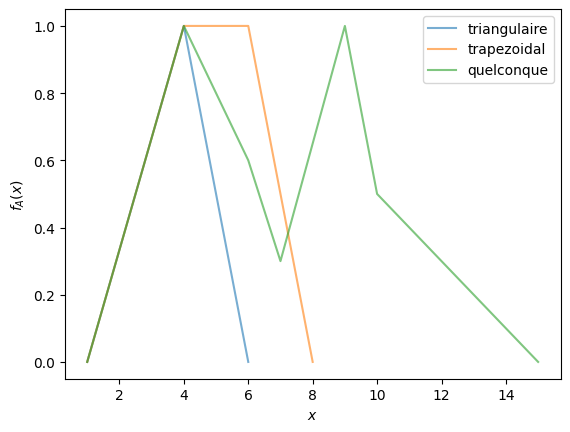

In [3]:
def plot_sef(sef: np.ndarray, name=None, alpha=1):
    """Affiche la courbe d'un sous-ensemble flou.

    :param np.ndarray sef: Sous-ensemble flou
    :param string name: Nom de la courbe, par défaut à None
    :param int alpha: Opacité des courbes, par défaut à 1
    """
    # x_values = sef[:, 0]
    # y_values = sef[:, 1]
    plt.plot(sef[:, 0], sef[:, 1], linestyle="-", label=name, alpha=alpha)
    plt.xlabel("$x$")
    plt.ylabel("$f_A(x)$")
    plt.legend()
    # plt.show()


def plot_sefs(sefs: dict, alpha=1, title=None):
    """Affiche la courbe de plusieurs sous-ensembles flous.

    :param dict sefs: Dictionnaire de sous-ensembles flou, où la clé représente son nom.
    :param int alpha: Opacité des courbes, par défaut à 1
    :param string title: Titre de la figure, par défaut à None
    """
    for name, values in sefs.items():
        plot_sef(values, name, alpha=alpha)
    if title:
        plt.gca().set_title(title)
    plt.show()


plot_sefs(sef, alpha=0.6)

# Opération ensemblistes

## Question 1

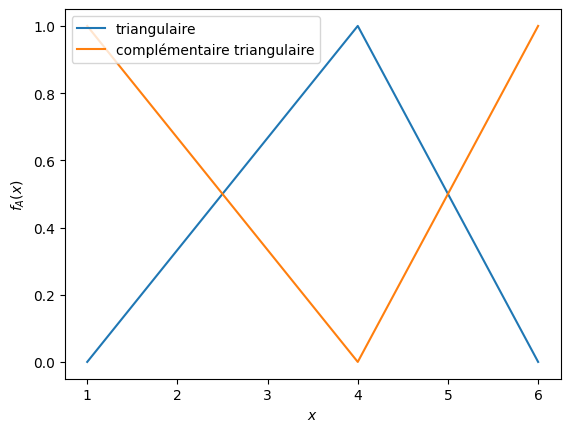

In [4]:
def complementaire(sef):
    """Construit le complémentaire d'un sous-ensemble flou.

    :param np.ndarray sef: Sous-ensemble flou
    :return np.ndarray: Complémentaire du sous-ensemble flou
    """
    sef_complementaire = sef.copy()
    sef_complementaire[:, 1] = 1 - sef_complementaire[:, 1]
    return sef_complementaire


plot_sefs(
    {
        "triangulaire": sef["triangulaire"],
        "complémentaire triangulaire": complementaire(sef["triangulaire"]),
    }
)

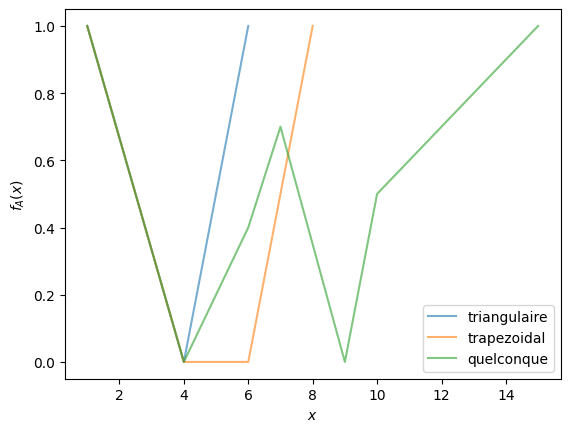

In [5]:
complementaries = {name: complementaire(sef[name]) for name in sef.keys()}
plot_sefs(complementaries, alpha=0.6)

## Question 2

In [6]:
class TNorme:
    @staticmethod
    def probabiliste(x, y):
        return x * y

    @staticmethod
    def lukasiewiez(x, y):
        return np.maximum(x + y - 1, 0)

    @staticmethod
    def zadeh(x, y):
        return np.minimum(x, y)

    @staticmethod
    def hamacher(x, y):
        return np.where(x == y == 0, 0, (x * y) / (x + y - x * y))

    @staticmethod
    def drastique(x, y):
        if x == 1:
            return y
        elif y == 1:
            return x
        else:
            return 0


class TConorme:
    @staticmethod
    def probabiliste(x, y):
        return x + y - x * y

    @staticmethod
    def lukasiewiez(x, y):
        return np.minimum(x + y, 1)

    @staticmethod
    def zadeh(x, y):
        return np.maximum(x, y)

    @staticmethod
    def hamacher(x, y):
        return (x + y) / (1 + x * y)

    @staticmethod
    def drastique(x, y):
        if x == 0:
            return y
        elif y == 0:
            return x
        else:
            return 1

## Question 3

In [7]:
def intersection(a, b, t_norme, step=100):
    # création de l'axe x, plein de points entre le min et max de a et b
    x = list(a[:, 0]) + list(b[:, 0])
    x_min = np.min(x)
    x_max = np.max(x)
    x = np.linspace(x_min, x_max, step)
    f_a = np.interp(x, a[:, 0], a[:, 1])
    f_b = np.interp(x, b[:, 0], b[:, 1])
    f_inter = t_norme(f_a, f_b)
    return np.vstack((x, f_inter)).T


def union(a, b, t_conorme, step=100):
    x = list(a[:, 0]) + list(b[:, 0])
    x_min = np.min(x)
    x_max = np.max(x)
    x = np.linspace(x_min, x_max, step)
    f_a = np.interp(x, a[:, 0], a[:, 1])
    f_b = np.interp(x, b[:, 0], b[:, 1])
    f_inter = t_conorme(f_a, f_b)
    return np.vstack((x, f_inter)).T

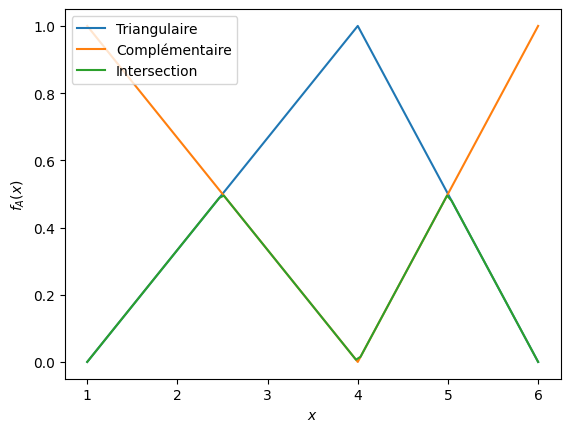

In [59]:
plot_sefs(
    {
        "Triangulaire": sef["triangulaire"],
        "Complémentaire": complementaries["triangulaire"],
        "Intersection": intersection(sef["triangulaire"], complementaries["triangulaire"], TNorme.zadeh),
    }
)

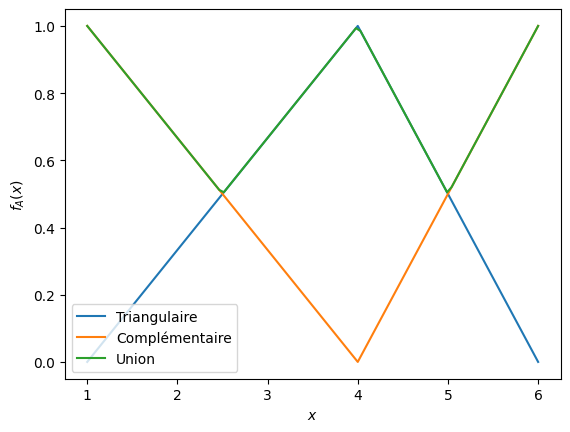

In [60]:
plot_sefs(
    {
        "Triangulaire": sef["triangulaire"],
        "Complémentaire": complementaries["triangulaire"],
        "Union": union(sef["triangulaire"], complementaries["triangulaire"], TConorme.zadeh),
    }
)

## Question 4

Classiquement : $ A \cap A^C = \varnothing $ et $ A \cup A^C = \Omega $. Cependant, ce n'est pas forcément le cas avec des ensembles flous : cela dépend de la t-norme employée et de l'ensemble choisi. On note qu'il est possible de retrouver les résultats avec des ensembles classiques, étant donné que les ensembles flous généralisent les ensembles classiques.

In [10]:
trapezoidal_classique = np.array([(4, 0), (4, 1), (6, 1), (6, 0)])
trapezoidal_flou = sef["trapezoidal"]
sec_trapezoidal = {
    "A": trapezoidal_classique,
    "Ac": complementaire(trapezoidal_classique),
}  # sous ensemble classique
sef_trapezoidal = {
    "A": trapezoidal_flou,
    "Ac": complementaire(trapezoidal_flou),
}

Expérimentons avec l'ensemble trapézoïdal classique et flou :

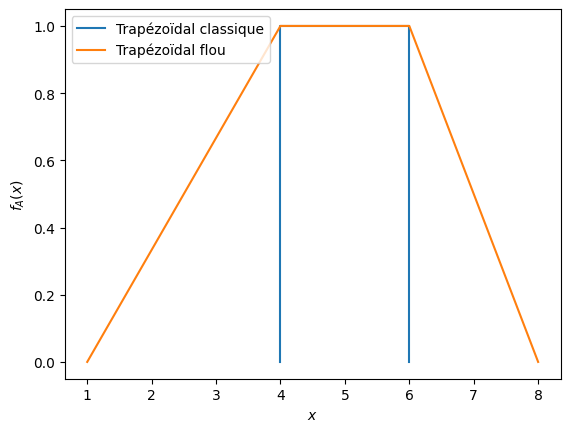

In [11]:
trapezoidal_sef = {  # sous ensemble classique
    "Trapézoïdal classique": trapezoidal_classique,
    "Trapézoïdal flou": sef["trapezoidal"],
}
plot_sefs(trapezoidal_sef)

### Vérification de la propriétés de non-contradiction

- Trapézoïdal classique = $A$
- Trapézoïdal classique complémentaire =$A^C$

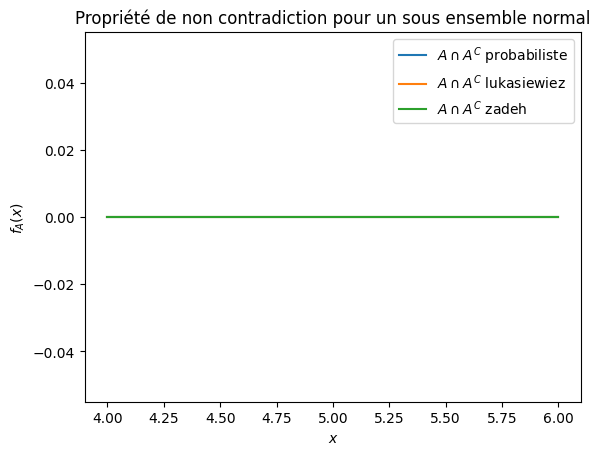

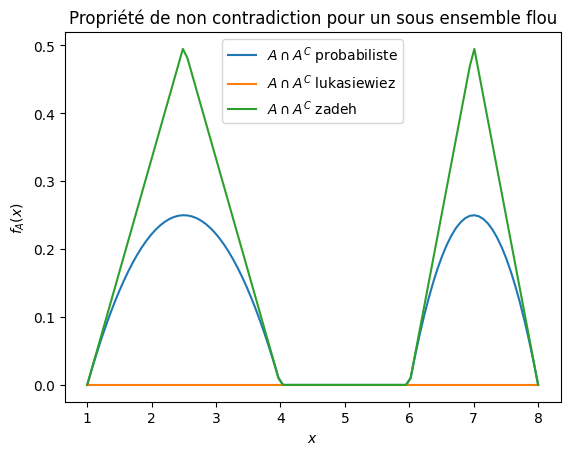

In [12]:
def plot_non_contradiction(d, *args, **kwds):
    """Affiche $A \cap A^C$ en utilisant plusieurs t-normes.

    :param dict d: Dictionnaire de forme {"A": ..., "Ac": ...}
    """
    plot_sefs(
        {
            "$A \cap A^C$ probabiliste": intersection(d["A"], d["Ac"], TNorme.probabiliste),
            "$A \cap A^C$ lukasiewiez": intersection(d["A"], d["Ac"], TNorme.lukasiewiez),
            "$A \cap A^C$ zadeh": intersection(d["A"], d["Ac"], TNorme.zadeh),
            # "$A \cap A^C$ hamacher": intersection(sec["A"], sec["Ac"], TNorme.hamacher),
            # "$A \cap A^C$ drastique": intersection(sec["A"], sec["Ac"], TNorme.drastique),
        },
        *args,
        **kwds
    )


plot_non_contradiction(sec_trapezoidal, title="Propriété de non contradiction pour un sous ensemble normal")
plot_non_contradiction(sef_trapezoidal, title="Propriété de non contradiction pour un sous ensemble flou")

La propriété de non contradiction reste vérifiée avec un sous ensemble non flou sur ces trois t-normes prises en exemple.

En revanche, pour un sous-ensemble flou, la proprété n'est vérifiée qu'en utilisant la t-norme de Zadeh.

### Vérification de la propriété de tiers exclu

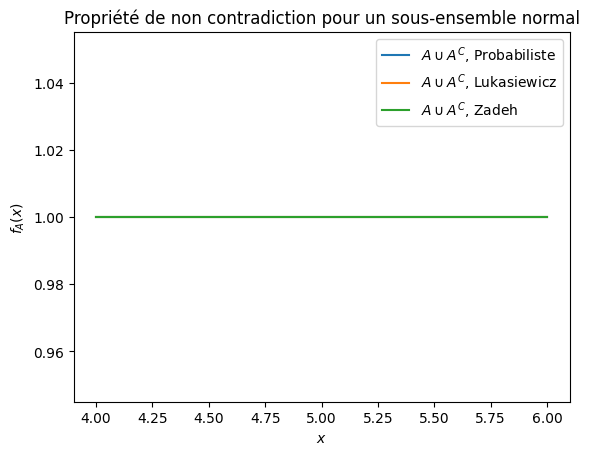

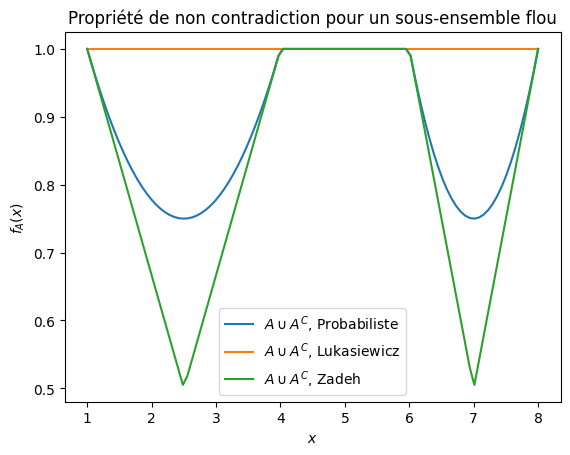

In [13]:
def plot_tier_exclu(d, *args, **kwds):
    """Affiche $A \cup A^C$ en utilisant plusieurs t-conormes.

    :param dict d: Dictionnaire de forme {"A": ..., "Ac": ...}
    """

    plot_sefs(
        {
            "$A \cup A^C$, Probabiliste": union(d["A"], d["Ac"], TConorme.probabiliste),
            "$A \cup A^C$, Lukasiewicz": union(d["A"], d["Ac"], TConorme.lukasiewiez),
            "$A \cup A^C$, Zadeh": union(d["A"], d["Ac"], TConorme.zadeh),
            # "$A \cap A^C$ hamacher": intersection(sec["A"], sec["Ac"], TNorme.hamacher),
            # "$A \cap A^C$ drastique": intersection(sec["A"], sec["Ac"], TNorme.drastique),
        },
        *args,
        **kwds
    )


plot_tier_exclu(sec_trapezoidal, title="Propriété de non contradiction pour un sous-ensemble normal")
plot_tier_exclu(sef_trapezoidal, title="Propriété de non contradiction pour un sous-ensemble flou")

La propriété de tiers exclu reste vérifié avec un sous-ensemble non flou sur ces trois t-normes pris en exemple. En revanche, pour un sous-ensemble flou, la propriété n'est vérifiée qu'en utilisant la t-norme de Lukasiewiez.

## Principe d'extension

## Question 1

In [62]:
class Phi:
    def __init__(self, expression, variable):
        self.expression = expression
        self.variable = variable

    def calcule(self, valeur):
        return self.expression.subs(self.variable, valeur)

    def antecedent(self, valeur):
        solutions = sp.solve(
            sp.Eq(self.expression, valeur),
            self.variable,
        )
        return solutions


x = sp.symbols("x", real=True)
phi = Phi(x**2, x)

# Calculer l'image de 3 par la fonction
display(phi.calcule(3))

# Trouver l'antécédent de 9 dans la fonction
display(phi.antecedent(9))

# Trouver l'antécédent de -1 dans la fonction
display(phi.antecedent(-1))

# Trouver l'antécédent de 9 dans la fonction
# display(phi.calcule(phi.antecedent(3)))

9

[-3, 3]

[]

phi -1 c'est l'ensemble des antécédents, quand on veut calculer, je veux ettendre mais je veux aussi savoir phi-1 on pour chaque y je veux une fonction antecedent qui pour un y donné me rend l'ensemble des données

## Question 2

On cherche l'image flou de A par $\phi$ donc pour moi on doit juste passer chaque point de notre ensemble $A$ dans $\phi$. Mais pourquoi on parle d'antécédents alors ? Parce que uniqument la définition je crois mdr (diapo 28)

$f_B(y) = $ l'image de notre sous ensemble flou

> **Exemple** : Quel est le prix TTC d’un livre qui vaut autour de 10 euros HT ?

Dans cette exemple $\phi(x) = 1.2x$.

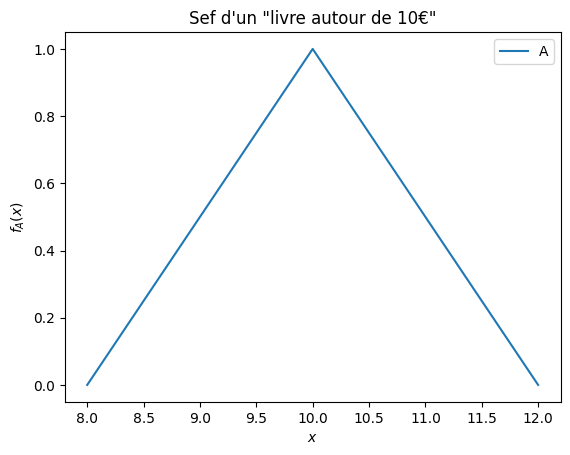

In [15]:
A = np.array([(8, 0), (10, 1), (12, 0)])
plot_sefs({"A": A}, title='Sef d\'un "livre autour de 10€"')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


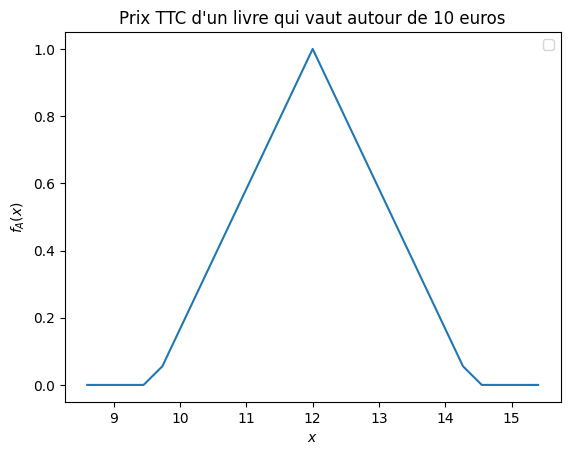

In [16]:
def extension(A, phi, num=25):
    f_b = []
    f_a = lambda x: np.interp(x, A[:, 0], A[:, 1])

    # obligé de boucler à un moment, c'est pas compatible avec les arrays
    # Il faut convertir en float sinon numpy n'arrive pas à identifier le dtype dans le linspace
    y = [float(phi.calcule(A[i, 0])) for i in range(len(A))]
    y_min = min(y) - 1
    y_max = max(y) + 1
    y = np.linspace(y_min, y_max, num)
    for y_i in y:  # je ne sais pas trop comment limiter y
        x_i = phi.antecedent(y_i)
        if len(x_i) == 0:
            f_b.append((y_i, 0))
        else:
            sup = f_a(x_i).max()
            f_b.append((y_i, sup))
    return np.array(f_b)


x = sp.symbols("x", real=True, strict=False)
phi = Phi(1.2 * x, x)
f_B = extension(A, phi)
plot_sefs({"": f_B}, title="Prix TTC d'un livre qui vaut autour de 10 euros")

# Opérations logiques

In [17]:
class FonctionImplication:
    @staticmethod
    def brouwer_godel(u, v):
        if (u <= v).all():
            return 1
        else:
            return v

    @staticmethod
    def goguen(u, v):
        if (u != 0).all():
            return np.minimum(v / u, 1)
        else:
            return 1

    @staticmethod
    def kleene_dienes(u, v):
        return np.maximum(1 - u, v)

    @staticmethod
    def larsen(u, v):
        return u * v

    @staticmethod
    def lukasiewiez(u, v):
        return np.minimum(1 - u + v, 1)

    @staticmethod
    def mamdani(u, v):
        return np.minimum(u, v)

    @staticmethod
    def reichenbach(u, v):
        return 1 - u + u * v

    @staticmethod
    def willmott(u, v):
        return np.maximum(1 - u, np.minimum(u, v))

## Question 1

In [18]:
isinstance(FonctionImplication.kleene_dienes, staticmethod)

False

In [23]:
# Make a list of all staticmethod that we created in `FonctionImplication`
# Create an empty list to store the static methods
staticmethods = []

# Loop over all the attributes and methods in the FonctionImplication class
for item in dir(FonctionImplication):
    # Check if the item is a staticmethod
    if callable(getattr(FonctionImplication, item)) and not item.startswith("__"):
        getattr(FonctionImplication, item)(1, 2)

print(staticmethods)

AttributeError: 'bool' object has no attribute 'all'

In [69]:
def implication_floue(A, B, x0, implication_function):
    """Renvoie un sous-ensemble flou résultant de l'application du Modus Ponens Généralisé à la règle A -> B.

    :param dict A: Sous-ensemble flou A
    :param dict B: Sous-ensemble flou B
    :param float x0: Observation précise
    :param func implication_function: Fonction d'implication floue F.
    :param func t_norm: T-norme
    :return dict: Sous-ensemble flou B'
    """
    f_a = lambda x: np.interp(x, A[:, 0], A[:, 1])
    f_b = lambda x: np.interp(x, B[:, 0], B[:, 1])

    implication_result = []
    values = list(A[:, 0]) + list(B[:, 0])
    value_min = np.min(values) - 1
    value_max = np.max(values) + 1
    y = np.linspace(value_min, value_max, 100)
    for y_i in y:
        # Calcule le résultat de la fonction d'implication
        implication_result.append((y_i, implication_function(f_a(x0), f_b(y_i))))

    return np.array(implication_result)

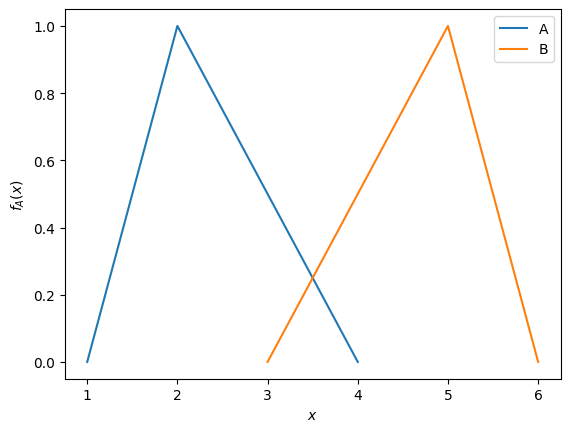

In [70]:
# Exemple d'observation précise
A = np.array([(1, 0), (2, 1), (4, 0)])
B = np.array([(3, 0), (5, 1), (6, 0)])
sef = {"A": A, "B": B}
x0 = 2.5
plot_sefs({"A": A, "B": B})

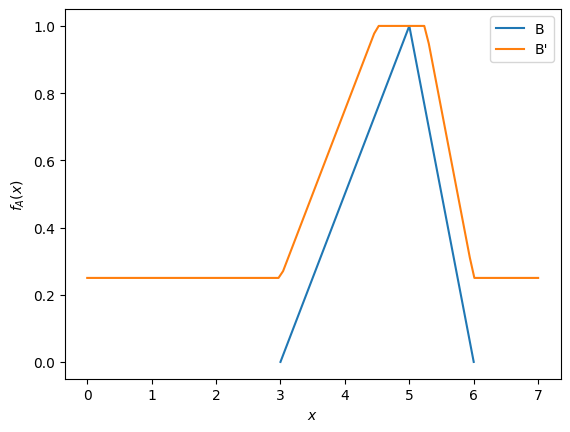

In [77]:
implication_function = FonctionImplication.lukasiewiez
result = implication_floue(A, B, 2.5, implication_function)
plot_sefs({"B":B, "B'": result})

In [28]:
for item in staticmethods:
    plot_sefs({**sef, **{item: implication_floue(A, B, x0, getattr(FonctionImplication, item))}})

![](https://media.discordapp.net/attachments/1047111061314220033/1163848328006619156/image.png?ex=65411138&is=652e9c38&hm=e4cd47c851e30308ccfb1b0c7513117ac619cb3ef6e9036648cd62c86bfe26ba)

## Question 3

In [29]:
def MPG(A, B, A_prime, implication_function, t_norm):
    """Applique le Modus Ponen Généralisé dans le cas général.

    :param dict A: Sous-ensemble flou
    :param dict B: Sous-ensemble flou
    :param dict A_prime: Observation floue
    :param func implication_function: Fonction d'implication floue
    :param func t_norm: T-norme
    :return dict: Sous-ensemble flou
    """
    f_a = lambda x: np.interp(x, A[:, 0], A[:, 1])
    f_a_prime = lambda x: np.interp(x, A_prime[:, 0], A_prime[:, 1])
    f_b = lambda x: np.interp(x, B[:, 0], B[:, 1])

    B_prime = []

    values = list(A[:, 0]) + list(B[:, 0])
    value_min = np.min(values)
    value_max = np.max(values)
    y = np.linspace(value_min, value_max, 100)
    x = np.linspace(
        value_min, value_max, 100
    )  # il faut le faire sur le support de A' car ailleurs ça vaut zéro et du coup la tnorme vaut zéro aussi

    f_a_x = f_a(x)
    f_a_prime_x = f_a_prime(x)
    for y_i in y:
        implication_result = implication_function(f_a_x, f_b(y_i))
        B_prime.append((y_i, t_norm(f_a_prime_x, np.array(implication_result)).max()))

    return np.array(B_prime)

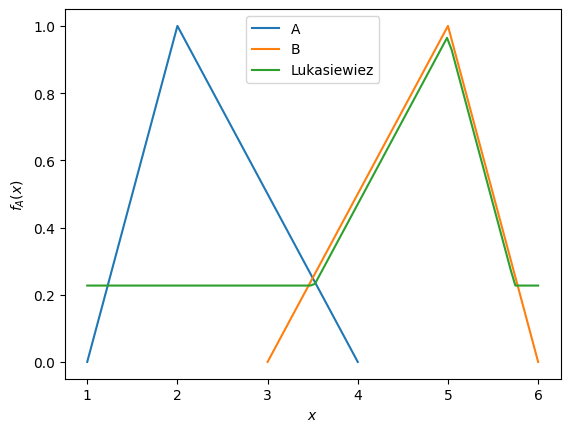

In [30]:
# Exemple
A = np.array([(1, 0), (2, 1), (4, 0)])
B = np.array([(3, 0), (5, 1), (6, 0)])
A_prime = np.array([(2, 0), (2.5, 1), (3, 0)])
implication_function = FonctionImplication.kleene_dienes
tnorme = TNorme.lukasiewiez
result = MPG(A, B, A_prime, implication_function, tnorme)
plot_sefs({"A": A, "B": B, "Lukasiewiez": result})

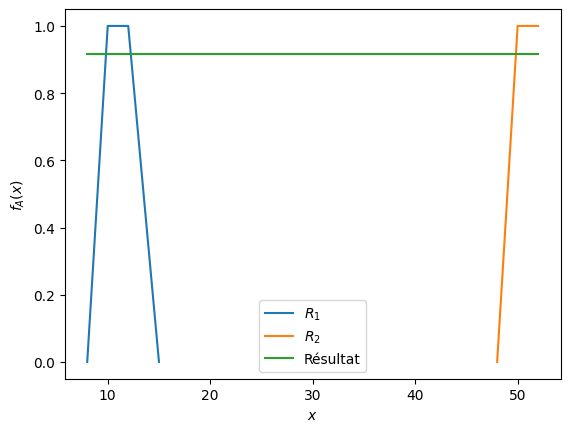

In [34]:
implication_function = FonctionImplication.kleene_dienes
R1 = np.array([(8, 0), (10, 1), (12, 1), (15, 0)])
R2 = np.array([(48, 0), (50, 1), (52, 1)])
F1 = 13
F2 = np.array([(47.5, 0), (49.5, 1), (51.5, 0)])
tnorme = TNorme.lukasiewiez
result = MPG(R1, R2, F2, implication_function, tnorme)
plot_sefs({"$R_1$": R1, "$R_2$": R2, "Résultat": result})

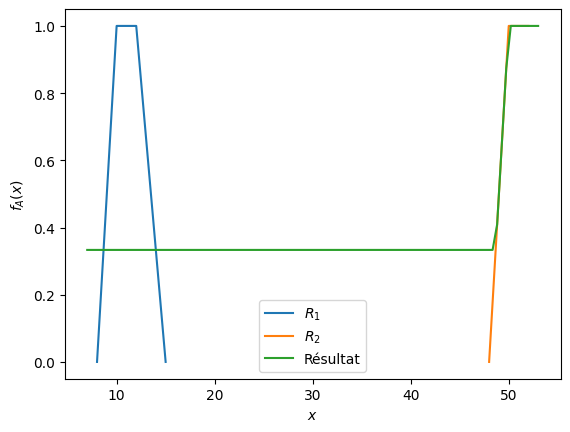

In [36]:
result = implication_floue(R1, R2, F1, implication_function)
plot_sefs({"$R_1$": R1, "$R_2$": R2, "Résultat": result})